# 1. 문제 정의하기

타이타닉호에 탑승했던 사람들의 정보를 바탕으로 생존자를 예측하는 문제이다.

# 2. 데이터 불러오기

먼저 필요한 라이브러리인 `numpy`와 `pandas`를 import하고, 데이터(train.csv, test.csv) 파일을 코드와 같은 디렉토리에 다운을 받고 pd.read_csv 를 이용해서 불러오자.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

적재한 훈련데이터를 확인하기 위해 head() 메서드를 이용하여 앞의 5열을 살펴본다.

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. 데이터 분석

각 특성의 의미를 간략하게 살펴보면

* Survivied는 생존 여부(0은 사망, 1은 생존; train 데이터에서만 제공),
* Pclass는 사회경제적 지위(1에 가까울 수록 높음),
* SipSp는 배우자나 형제 자매 명 수의 총 합,
* Parch는 부모 자식 명 수의 총 합을 나타낸다.

이제 각각 특성들의 의미를 알았으니, 주어진 데이터에서 대해 간략하게 살펴보자.

In [3]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):


범주형 특성과 수치형 특성들로 나뉨을 알 수 있다.

## 3.1. 범주형 특성에 대한 Pie chart

데이터 값의 분포를 보기 위한 `matplotlib` 와 `seaborn` 라이브러리를 불러온다.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

먼저 다음과 같은 범주형 특성의 분포를 보기 위해서 Pie chart를 만드는 함수를 정의해보자.

* Sex
* Pclass
* Embarked

In [5]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
 

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

먼저 `Sex`에 대해서 Pie chart를 그려보면,

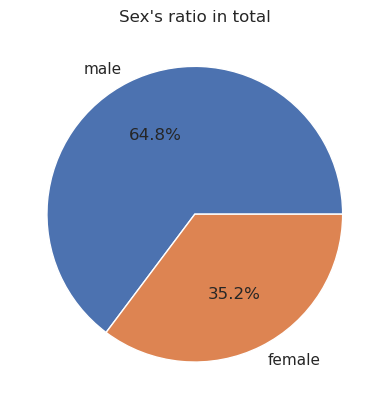

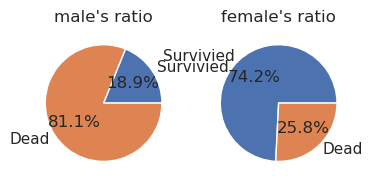

In [6]:
pie_chart('Sex')

위와 같이 남성이 여성보다 배에 많이 탔으며, 남성보다 여성의 생존 비율이 높다는 것을 알 수가 있다.
이제 사회경제적 지위인 `Pclass`에 대해서도 그려보자.

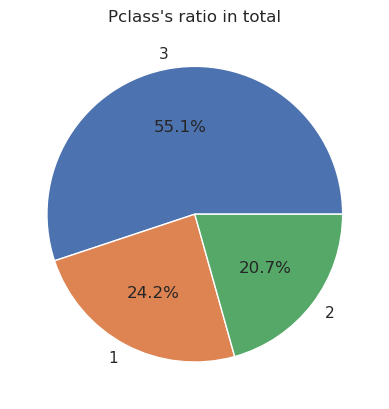

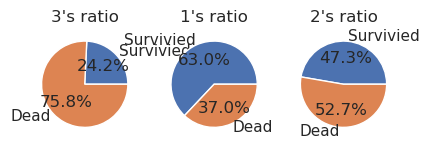

In [7]:
pie_chart('Pclass')

위와 같이 Pclass가 3인 사람들의 수가 가장 많았으면 Pclass가 높을 수록 생존 비율이 높다는 것을 알 수 있다.
마지막으로 어느 곳에서 배를 탔는지를 나타내는 `Embarked`에 대해서 살펴보자.

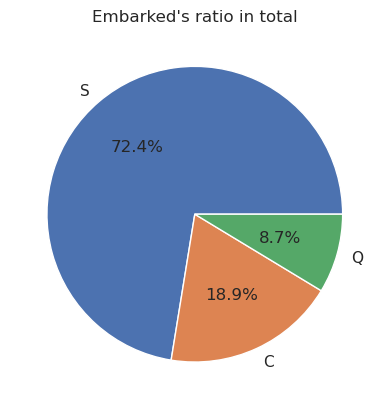

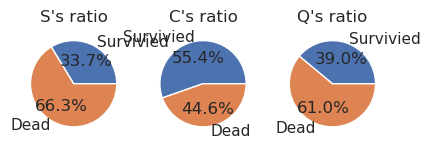

In [8]:
pie_chart('Embarked')

위와 같이 Southampton에서 선착한 사람이 가장 많았으며, Cherbourg에서 탄 사람 중에 생존한 사람의 비율이 높았고, 나머지 두 선착장에서 탄 사람들은 생존한 사람보다 그렇지 못한 사람이 조금 더 많았다.

## 3.2. 범주형 특성에 대한 Bar chart

이번에는 아래의 특성들에 대허서 Bar chart를 정의해서 데이터를 시각화 해보자.

In [9]:
def bar_chart(feature):
     survived = train[train['Survived']==1][feature].value_counts()
     dead = train[train['Survived']==0][feature].value_counts()
     df = pd.DataFrame([survived,dead])
     df.index = ['Survived','Dead']
     df.plot(kind='bar',stacked=True, figsize=(10,5))

먼저`SibSp`에 대해서 Bar chart를 그려보자.

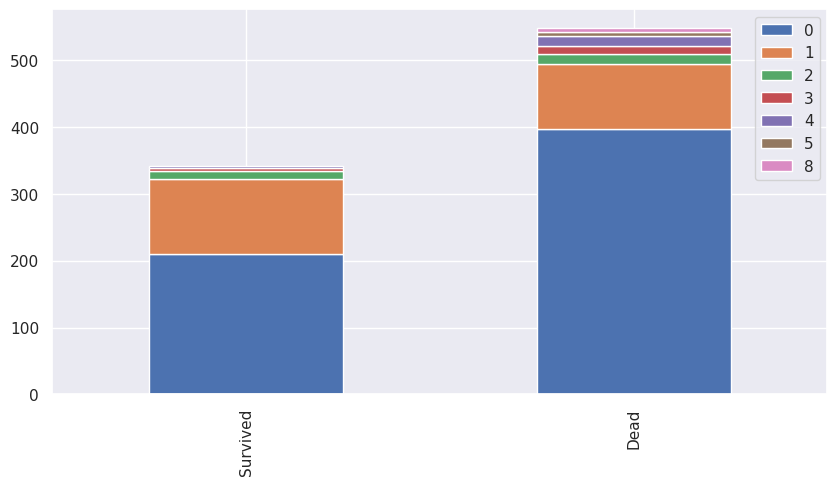

In [10]:
bar_chart('SibSp')

위와 같이 2명 이상의 형제나 배우자와 함께 탔을 경우 생존한 사람의 비율이 컸다는 것을 볼 수 있고, 그렇지 않을 경우에는 생존한 사람의 비율이 적었다는 것을 볼 수 있다.

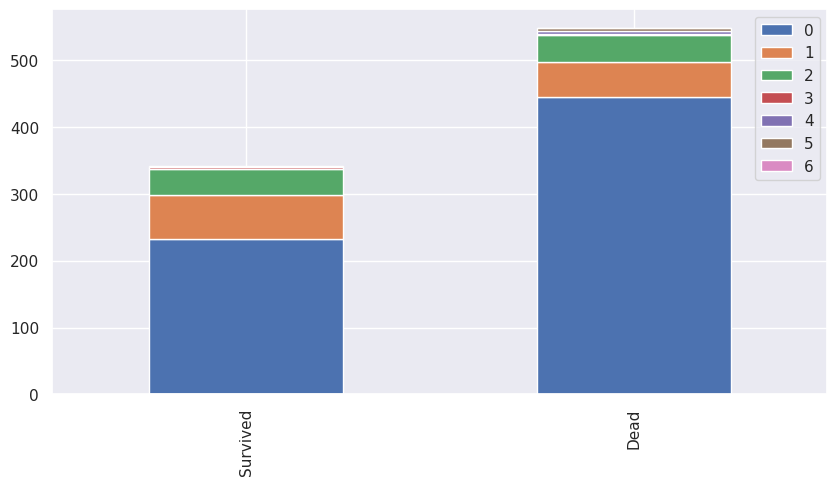

In [11]:
bar_chart('Parch')

`Parch`특성은 `SibSp`와 비슷하게 2명 이상의 부모나 자식과 함께 배에 탔을 때는 조금 더 생존했지만, 그렇지 않을 경우에는 생존한 사람의 비율이 적었다.

지금까지 살펴본 데이터 특성들을 간략하게 종합해보면,
성별이 여성일 수록(영화 타이타닉에서 나온 것 처럼 여성과 아이부터 먼저 살렸기 때문이 아닐까 싶고),
`Pclass`가 높을 수록(맨 위의 사진을 보면 타이타닉 호는 배의 후미부터 잠기기 시작되었다는 것을 알 수 있는데, 티켓의 등급이 높아질 수록 숙소가 배의 앞쪽과 위쪽으로 가는 경향이 있어 그 영향이 아닐까 싶고),
`Cherbourg` 선착장에서 배를 탔다면,
형제, 자매, 배우자, 부모, 자녀와 함께 배에 탔다면,
생존 확률이 더 높았다는 것을 볼 수 있다.

하지만 하나의 특성과 생존 비율 만을 생각해서 예측하기에는 무리가 있다.

예를 들어 높은 금액의 티켓(살 확률이 높은 숙소를 가진)을 산 부유한 사람이 가족들이랑 왔을 경우가 많다고 가정해본다면, 가족들과 함께 왔다고 해서 살 가능성이 높다고 할 수는 없으므로 단일 특성을 가지고 생존 확률을 예측하기보단 여러가지 특성을 종합해서 예측을 하는 것이 더 좋을 것이다.

# 4. 데이터 전처리 및 특성 추출

이제는 앞으로 예측할 모델에게 학습을 시킬 특성을 골라서 학습하기에 알맞게 전처리 과정을 진행 해볼 것이다.

의미를 찾지 못한 `Ticket`과 `Cabin` 특성을 제외한 나머지 특성을 가지고 전처리를 진행한다.

또한 데이터 전처리를 하는 과정에서는 훈련셋과 테스트셋을 같은 방법으로 한 번에 처리를 해야하므로 먼저 두 개의 데이터를 합쳐본다.

In [12]:
train_and_test = [train, test]

## 4.1. 이름 특성

이름이 중요한 것 같이 않지만 `Name` 정보에는 Title이 있는데, 이를 통해서 승객의 성별이나 나이대, 결혼 유무를 알 수 있다. 성별과 나이는 이미 데이터에 들어 있지만 일단 Title을 가져오도록 한다.

데이터에 `Title`이라는 새로운 열을 만들어 Title 정보를 넣자.

In [13]:
for dataset in train_and_test:
 	dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


위에서 쓰인 ' ([A-Za-z]+)\.'는 정규표현식인데, 공백으로 시작하고, `.`로 끝나는 문자열을 추출할 때 저렇게 표현한다.

한편 추출한 Title을 가진 사람이 몇 명이나 존재하는지 성별과 함께 표현을 해보자.

In [14]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


여기서 흔하지 않은 Title은 Other로 대체하고 중복되는 표현을 통일하자.

In [15]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


그리고 추출한 Title 데이터를 학습하기 알맞게 String Data로 변형해주면 된다.

In [16]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

## 4.2. 성 특성

이번에는 승객의 성별을 나타내는 `Sex` Feature를 처리할 것인데 이미 male과 female로 나뉘어져 있으므로 String Data로만 변형해주면 된다.

In [17]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

## 4.3. 탑승 항구 특성

이제 배를 탑승한 선착장을 나타내는 `Embarked` Feature를 처리해보자.

일단 위에서 간략하게 살펴본 데이터 정보에 따르면 train 데이터에서 `Embarked` feature에는 NaN 값이 존재하며, 다음을 보면 잘 알 수 있다.

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

`Embarked` 특성에 2개의 결측치를 확인할 수 있다.

데이터 분석시 결측치가 존재하면 안 되므로 이를 메꾸도록 한다.

In [19]:
train['Embarked'].fillna('S',inplace=True)

여기서는 단순하게 이 두 사람은 사람이 제일 많이 탑승한 항구인 ‘Southampton’에서 탔다고 가정한다.

그리고 String Data로 변형

In [20]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

## 4.4. 나이 특성

`Age` Feature에도 NaN값은 존재하는데, 일단 빠진 값에는 나머지 모든 승객 나이의 평균을 넣어주자.

한편 연속적인 numeric data를 처리하는 방법에도 여러가지가 있는데, 이번에는 Binning을 사용할 것이다.

Binnig이란 여러 종류의 데이터에 대해 범위를 지정해주거나 카테고리를 통해 이전보다 작은 수의 그룹으로 만드는 기법이다.

이를 통해서 단일성 분포의 왜곡을 막을 수 있지만, 이산화를 통한 데이터의 손실이라는 단점도 존재한다.

이번에는 pd.cut()을 이용해 같은 길이의 구간을 가지는 다섯 개의 그룹을 만들어 보자.

이제 `Age`에 들어 있는 값을 위에서 구한 구간에 속하도록 바꿔준다.

In [21]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


이제 `Age`에 들어 있는 값을 위에서 구한 구간에 속하도록 바꿔준다.

In [22]:
for dataset in train_and_test:
     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
     dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
     dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

여기서 `Age`을 numeric이 아닌 string 형식으로 넣어주었는데, 숫자에 대한 경향성을 가지고 싶지 않아서 그렇게 했다.

사실 Binning과 같이 여기에도 장단점이 존재하는 것 같아 다음번에는 Numeric type으로 학습시켜서 어떻게 예측 결과가 달라지는지도 봐야겠다.

## 4.5. Fare 특성

Test 데이터 중에서 `Fare` Feature에도 NaN 값이 하나 존재하는데, Pclass와 Fare가 어느 정도 연관성이 있는 것 같아 Fare 데이터가 빠진 값의 Pclass를 가진 사람들의 평균 Fare를 넣어주는 식으로 처리를 해보자.

In [23]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


위에서 볼 수 있듯이 누락된 데이터의 Pclass는 3이고, train 데이터에서 Pclass가 3인 사람들의 평균 Fare가 13.675550이므로 이 값을 넣어주자.

In [24]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675) # The only one empty fare data's pclass is 3.

`Age`에서 했던 것처럼 `Fare`에서도 Binning을 해보자. 이번에는 Age에서 했던 것 과는 다르게 Numeric한 값으로 남겨두자.

In [25]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

## 4.6. 가족 특성

위에서 살펴봤듯이 형제, 자매, 배우자, 부모님, 자녀의 수가 많을 수록 생존한 경우가 많았는데, 두 개의 Feature를 합쳐서 `Family`라는 Feature로 만들자.

In [26]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

## 4.7. 특성 추출 및 나머지 전처리

이제 사용할 Feature에 대해서는 전처리가 되었으니, 학습시킬때 제외시킬 Feature들을 Drop 시키자.

In [27]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


위와 같이 가공된 train, test 데이터를 볼 수 있다.

마지막으로 Categorical Feature에 대해 one-hot encoding과 train data와 label을 분리시키는 작업을 하면 예측 모델에 학습시킬 준비가 끝났다.

In [28]:
# One-hot-encoding for categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

# 5. 모델 설계 및 학습

이번에 사용할 예측 모델은 다음과 같이 5가지가 있다.

1. Logistic Regression
2. Support Vector Machine (SVM)
3. k-Nearest Neighbor (kNN)
4. Random Forest
5. Naive Bayes

나중에 위의 모델에 대한 자세한 설명을 포스팅 할 텐데, 일단 이런 예측 모델이 있다고 하고 넘어가자.

일단 위 모델을 사용하기 위해서 필요한 `scikit-learn` 라이브러리를 불러오자.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

학습시키기 전에는 주어진 데이터가 정렬되어있어 학습에 방해가 될 수도 있으므로 섞어주도록 하자.

In [30]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

이제 모델 학습과 평가에 대한 pipeline을 만들자.

사실 scikit-learn에서 제공하는 fit()과 predict()를 사용하면 매우 간단하게 학습과 예측을 할 수 있어서 그냥 하나의 함수만 만들면 편하게 사용가능하다.

In [31]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

이 함수에 다섯가지 모델을 넣어주면 학습과 평가가 완료된다.

In [32]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  82.72 %
Accuracy :  83.5 %
Accuracy :  84.51 %
Accuracy :  88.55 %
Accuracy :  79.8 %


# 6. 마무리

위에서 볼 수 있듯 4번째 모델인 Random Forest에서 가장 높은 정확도(88.55%)를 보였는데, 이 모델을 채택해서 submission 해보자.

In [33]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)